<a href="https://colab.research.google.com/github/aayushi-29/VCET-DS/blob/main/Data_Engineering(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("tested.csv")

#Preparing X and Y

X = df.drop('PassengerId', axis=1)
X = X.drop('Embarked', axis=1)
Y = df['Embarked']
print(X)
print(Y)

     Survived  Pclass                                          Name     Sex  \
0           0       3                              Kelly, Mr. James    male   
1           1       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           0       2                     Myles, Mr. Thomas Francis    male   
3           0       3                              Wirz, Mr. Albert    male   
4           1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..        ...     ...                                           ...     ...   
413         0       3                            Spector, Mr. Woolf    male   
414         1       1                  Oliva y Ocana, Dona. Fermina  female   
415         0       3                  Saether, Mr. Simon Sivertsen    male   
416         0       3                           Ware, Mr. Frederick    male   
417         0       3                      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fa

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Initialize the Logistic Regression model
logr = LogisticRegression(max_iter=200)

# Read the dataset
df = pd.read_csv("tested.csv")

# Prepare the feature and target variables
x = df.drop(['PassengerId', 'Embarked'], axis=1)
y = df['Embarked']

# One-hot encode categorical variables if necessary
x = pd.get_dummies(x)

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x) # store result of imputation

# Convert imputed NumPy array back to a DataFrame and re-assign column names
x = pd.DataFrame(x_imputed, columns=x.columns)

# Encode the target variable 'Embarked' to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x, y)  # Note: fitting with x and y (numerical target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns) # Now that x is a DataFrame again, this should work
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs      Score
0       Survived   4.446112
1         Pclass  18.087531
2            Age  58.308720
3          SibSp   8.338599
4          Parch  19.210552
..           ...        ...
860  Cabin_F G63   0.548148
861     Cabin_F2   0.548148
862    Cabin_F33   0.548148
863     Cabin_F4   1.096296
864     Cabin_G6   0.548148

[865 rows x 2 columns]


[0.01666978 0.08551109 0.11936408 0.0150037  0.12080079 0.04938286
 0.04198012 0.24340431 0.23128436 0.07659893]


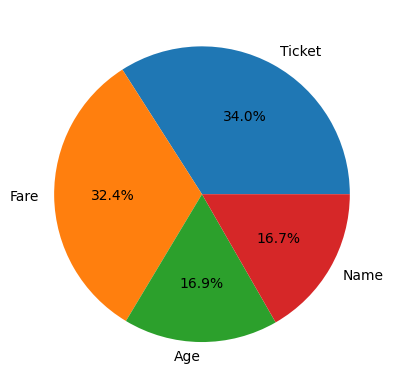

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

model.fit(X_encoded,Y) # Fit the model with encoded features
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [43]:
#Numerical to Categorical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is already defined and loaded with the necessary data

# Check if 'Age' and 'Fare' are already categorical and convert to numeric if needed
if df['Age'].dtype.name == 'category':
    df['Age'] = df['Age'].cat.codes  # Convert categories to numerical codes
if df['Fare'].dtype.name == 'category':
    df['Fare'] = df['Fare'].cat.codes  # Convert categories to numerical codes

# Converting numerical columns to categorical
df['Age'] = pd.cut(df['Age'], 3, labels=['0', '1', '2'])
df['Fare'] = pd.cut(df['Fare'], 3, labels=['0', '1', '2'])

# Ensure 'Survived' and 'Pclass' are treated as categorical
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

print(df)

# Preparing X and Y
X = df.drop(['PassengerId', 'Embarked'], axis=1)
Y = df['Embarked']
print(Y)

# Encoding Y (Embarked)
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

     PassengerId Survived Pclass  \
0            892        0      2   
1            893        2      2   
2            894        0      1   
3            895        0      2   
4            896        2      2   
..           ...      ...    ...   
413         1305        0      2   
414         1306        2      0   
415         1307        0      2   
416         1308        0      2   
417         1309        0      2   

                                             Name     Sex Age  SibSp  Parch  \
0                                Kelly, Mr. James    male   1      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female   1      1      0   
2                       Myles, Mr. Thomas Francis    male   2      0      0   
3                                Wirz, Mr. Albert    male   1      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   0      1      1   
..                                            ...     ...  ..    ...    ...   
413           

In [ ]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)


In [ ]:
#Dealing with missing values

print(df.isnull().sum())

# If there are missing values in numerical columns like 'Fare', you can impute them:
# df['Fare'].fillna(df['Fare'].mean(), inplace=True)  # This line causes the error
# Instead of calculating the mean on categorical data, you might want to use mode to fill missing values:
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

# If there are missing values in categorical columns like 'Embarked', you can impute them:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import pandas as pd

# Sample DataFrame (you can replace this with your actual DataFrame)
# df = pd.read_csv('your_file.csv') # If reading from a CSV file

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    # Imputing numerical values (choose one method: mean, median, or mode)
    # Method: Mean
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [39]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Assuming X and Y are already defined

# Print the initial class distribution
print("Initial class distribution:", Counter(Y))

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns

# Handle missing values for numeric columns only
imputer = SimpleImputer(strategy='mean')
X_numeric = X.select_dtypes(include=np.number)
X_numeric = imputer.fit_transform(X_numeric)

# Handle missing values in non-numeric columns (using most frequent value)
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_non_numeric = X.select_dtypes(exclude=np.number)
X_non_numeric = imputer_categorical.fit_transform(X_non_numeric)

# Convert non-numeric columns to numerical using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Create OneHotEncoder instance
X_non_numeric_encoded = encoder.fit_transform(X_non_numeric) # Fit and transform non-numeric data

# Combine imputed numeric and encoded non-numeric data back into X
X = np.concatenate([X_numeric, X_non_numeric_encoded], axis=1) # Use np.concatenate for numerical arrays

# Random OverSampling
ros = RandomOverSampler(random_state=0)
X_ros, Y_ros = ros.fit_resample(X, Y)
print("After Random OverSampling:", Counter(Y_ros))

# Synthetic Minority Oversampling (SMOTE)
smote = SMOTE(random_state=0)
X_smote, Y_smote = smote.fit_resample(X_ros, Y_ros) # Now X_ros contains only numerical data
print("After SMOTE:", Counter(Y_smote))

# Random UnderSampling
rus = RandomUnderSampler(random_state=0)
X_rus, Y_rus = rus.fit_resample(X_smote, Y_smote)
print("After Random UnderSampling:", Counter(Y_rus))

Initial class distribution: Counter({1: 270, 2: 270, 0: 270})
After Random OverSampling: Counter({1: 270, 2: 270, 0: 270})
After SMOTE: Counter({1: 270, 2: 270, 0: 270})
After Random UnderSampling: Counter({0: 270, 1: 270, 2: 270})


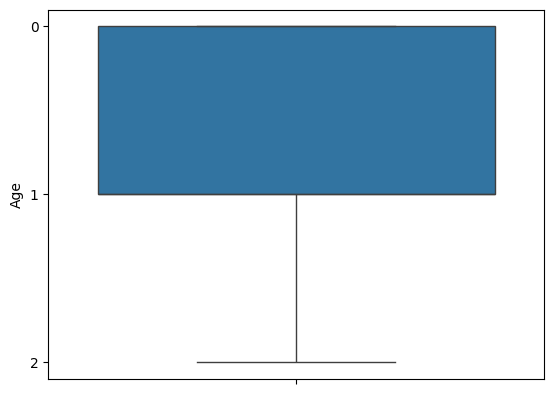

In [40]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Age'])
plt.show()

In [44]:
import pandas as pd

# Convert 'Fare' column to numeric, coercing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Drop rows with NaN values in 'Fare' for accurate quantile calculation
df.dropna(subset=['Fare'], inplace=True)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace outliers with the upper and lower bounds
df['Fare'] = df['Fare'].clip(lower=lower, upper=upper)

print(df['Fare'])


0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Fare, Length: 418, dtype: int64


In [46]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for categorical target

logr=LogisticRegression()
pca=PCA(n_components=2)

# Drop irrelevant columns (adjust as needed)
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle non-numeric features
# 1. Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns

# 2. Convert non-numeric columns to numerical using LabelEncoder
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Y = df['Embarked']

# Encode the target variable 'Embarked'
le = LabelEncoder()
Y = le.fit_transform(Y)

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-6.61813933e-01 -3.40366787e-01]
 [ 2.75062121e-01 -6.63229056e-01]
 [-7.72932939e-01  6.06339439e-01]
 [-5.16661040e-01 -9.83058227e-01]
 [ 1.09851525e+00 -8.12255220e-01]
 [-4.74970539e-01 -1.24574258e+00]
 [-4.52617976e-01 -8.21019004e-02]
 [ 7.78200285e-01 -1.23813880e-01]
 [-5.56080367e-01  2.97905187e-01]
 [ 6.90083868e-01 -1.12261401e+00]
 [-5.16661040e-01 -9.83058227e-01]
 [-6.55518051e-01  3.84985519e-01]
 [ 1.77895611e-01  4.42130337e-01]
 [-4.52528428e-02  2.52122840e-02]
 [ 1.36205110e-01  7.04814690e-01]
 [-4.29816691e-02  1.04349134e+00]
 [-7.31242438e-01  3.43655086e-01]
 [-7.65276324e-01  3.96403002e-02]
 [ 2.75062121e-01 -6.63229056e-01]
 [-5.97770868e-01  5.60589540e-01]
 [-4.04987133e-01  1.99461704e+00]
 [ 3.06792088e-01 -1.13208439e+00]
 [-4.46322094e-01  6.43250406e-01]
 [-1.22370708e-01  1.52134224e+00]
 [ 2.19118721e+00  2.33117214e+00]
 [ 6.58661635e-02 -9.21493942e-01]
 [ 8.68252494e-02  1.77960712e+00]
 [-7.65276324e-01  3.96403002e-02]
 [-6.55518051e-01  3